In [28]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, LSTM
import math
from sklearn.preprocessing import MinMaxScaler


In [3]:
data = pd.read_csv('/content/drive/MyDrive/ML stuff/all_stocks_5yr.csv')

In [4]:
data.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [5]:
stock_name = 'PSX'

In [6]:
all_data = data['Name'] == stock_name

In [7]:
# 3. Putting all the rows of specific stock in a variable
final_data = data[all_data]

In [8]:
final_data.head()

,date,open,high,low,close,volume,Name
467759,2013-02-08,63.41,65.24,63.22,64.02,4745571,PSX
467760,2013-02-11,64.00,64.66,63.72,64.18,3097765,PSX
467761,2013-02-12,64.62,64.78,63.78,64.43,3701971,PSX
467762,2013-02-13,64.50,64.50,63.85,64.11,2777089,PSX
467763,2013-02-14,63.77,64.92,63.75,64.83,3559969,PSX


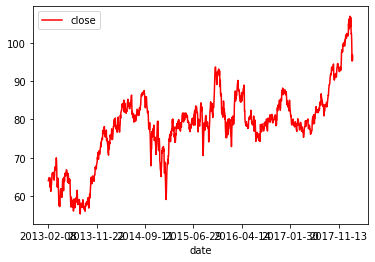

In [9]:
#  Plotting date vs the close market stock price
final_data.plot('date','close',color="red")

In [10]:
# Extract only top 60 rows to make the plot a little clearer
new_data = final_data.head(60)

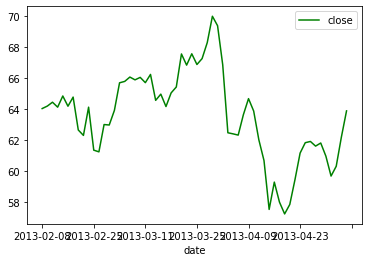

In [11]:
#Plotting date vs the close  market stock price
new_data.plot('date','close',color="green")

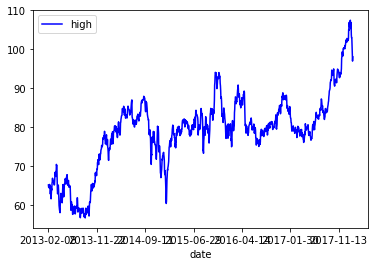

In [12]:
final_data.plot('date','high',color="blue")

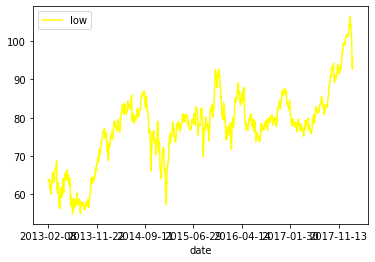

In [13]:
final_data.plot('date','low',color="yellow")

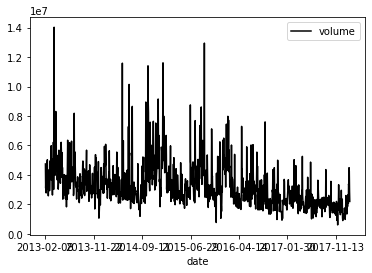

In [14]:
final_data.plot('date','volume',color="black")

Creating a new Dataframe and Training data


In [15]:
# 1. Filter out the closing market price data
close_data = final_data.filter(['close'])

In [16]:
# 2. Convert the data into array for easy evaluation
dataset = close_data.values

In [17]:
# 3. Scale/Normalize the data to make all values between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)
 

In [18]:
# 4. Creating training data size : 70% of the data
training_data_len = math.ceil(len(dataset) *.7)
train_data = scaled_data[0:training_data_len  , : ]

In [19]:
# 5. Separating the data into x and y data
x_train_data=[]
y_train_data =[]
for i in range(60,len(train_data)):
    x_train_data=list(x_train_data)
    y_train_data=list(y_train_data)
    x_train_data.append(train_data[i-60:i,0])
    y_train_data.append(train_data[i,0])

In [20]:
# 6. Converting the training x and y values to numpy arrays
x_train_data1, y_train_data1 = np.array(x_train_data), np.array(y_train_data)

In [21]:
# 7. Reshaping training s and y data to make the calculations easier
x_train_data2 = np.reshape(x_train_data1, (x_train_data1.shape[0],x_train_data1.shape[1],1))


In [22]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True,input_shape=(x_train_data2.shape[1],1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

In [23]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train_data2, y_train_data1, batch_size=1, epochs=1)

822/822 [==============================] - 26s 27ms/step - loss: 0.0040


In [24]:
# 1. Creating a dataset for testing
test_data = scaled_data[training_data_len - 60: , : ]
x_test = []
y_test =  dataset[training_data_len : , : ]
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [25]:
# 2.  Convert the values into arrays for easier computation
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [26]:
# 3. Making predictions on the testing data
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)


In [27]:
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
print(rmse)

2.3940031608541936


In [ ]:
train = data[:training_data_len]
valid = data[training_data_len:]
 
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close')
 
plt.plot(train['close'])
plt.plot(valid[['close', 'Predictions']])
 
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
 
plt.show()

ValueError: ignored